In [1]:
# ==============================================
# COMMON IMPORTS (Run this cell first)
# ==============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import seaborn as sns
import os
import zipfile
import requests
import io

# Set random seeds for reproducibility (optional)
np.random.seed(42)
tf.random.set_seed(42)

print("TensorFlow Version:", tf.__version__)
print("Keras Version:", keras.__version__)

/Users/aditya/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


TensorFlow Version: 2.19.0
Keras Version: 3.9.2



--- Assignment 4: Digit Recognition (CNN on MNIST) ---
Loading MNIST dataset...
x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
Building MNIST CNN model...


Model: "mnist_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

Compiling MNIST CNN model...
Training MNIST CNN model...
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.7591 - loss: 0.7894 - val_accuracy: 0.9780 - val_loss: 0.0768
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9648 - loss: 0.1123 - val_accuracy: 0.9857 - val_loss: 0.0525
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9751 - loss: 0.0820 - val_accuracy: 0.9873 - val_loss: 0.0454
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9782 - loss: 0.0694 - val_accuracy: 0.9885 - val_loss: 0.0406
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9824 - loss: 0.0581 - val_accuracy: 0.9903 - val_loss: 0.0373
Evaluating MNIST CNN model...
Test loss: 0.0340
Test accuracy: 0.9886


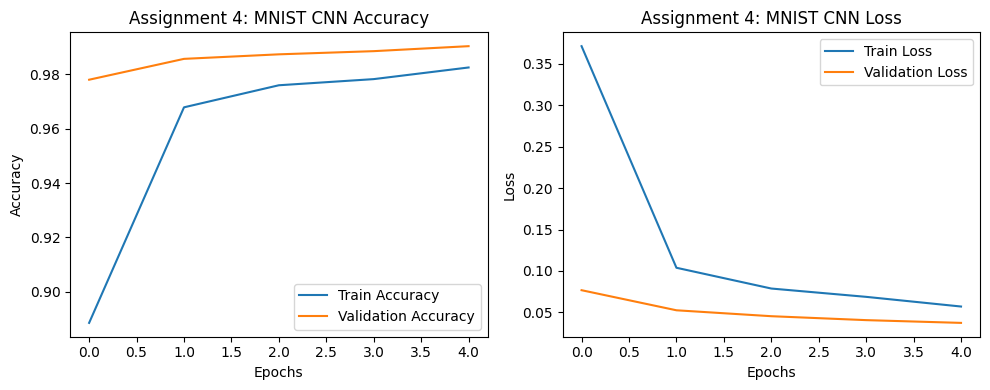

In [2]:
# ==============================================
# Assignment 4: Digit Recognition (CNN on MNIST)
# ==============================================
print("\n--- Assignment 4: Digit Recognition (CNN on MNIST) ---")

# --- 1. Load and Preprocess the MNIST Dataset ---
print("Loading MNIST dataset...")
(x_train_mnist_cnn, y_train_mnist_cnn), (x_test_mnist_cnn, y_test_mnist_cnn) = keras.datasets.mnist.load_data()

# Preprocess Data: Reshape for CNN (add channel dimension), normalize, one-hot encode labels
img_rows, img_cols = 28, 28
num_classes_mnist = 10

x_train_mnist_cnn = x_train_mnist_cnn.reshape(x_train_mnist_cnn.shape[0], img_rows, img_cols, 1)
x_test_mnist_cnn = x_test_mnist_cnn.reshape(x_test_mnist_cnn.shape[0], img_rows, img_cols, 1)
input_shape_mnist = (img_rows, img_cols, 1)

x_train_mnist_cnn = x_train_mnist_cnn.astype('float32') / 255.0
x_test_mnist_cnn = x_test_mnist_cnn.astype('float32') / 255.0

y_train_mnist_cnn = keras.utils.to_categorical(y_train_mnist_cnn, num_classes_mnist)
y_test_mnist_cnn = keras.utils.to_categorical(y_test_mnist_cnn, num_classes_mnist)

print(f"x_train shape: {x_train_mnist_cnn.shape}")
print(f"y_train shape: {y_train_mnist_cnn.shape}")

# --- 2. Define the CNN Architecture ---
print("Building MNIST CNN model...")
model_mnist_cnn = keras.Sequential(
    [
        keras.Input(shape=input_shape_mnist),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes_mnist, activation="softmax"),
    ],
    name="mnist_cnn"
)
model_mnist_cnn.summary()

# --- 3. Compile the Model ---
print("Compiling MNIST CNN model...")
model_mnist_cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# --- 4. Train the Model ---
print("Training MNIST CNN model...")
batch_size_cnn = 128
epochs_cnn = 5 # Reduced for quick demo
history_mnist_cnn = model_mnist_cnn.fit(x_train_mnist_cnn, y_train_mnist_cnn,
                                      batch_size=batch_size_cnn,
                                      epochs=epochs_cnn,
                                      validation_split=0.1)

# --- 5. Evaluate the Model ---
print("Evaluating MNIST CNN model...")
score_mnist_cnn = model_mnist_cnn.evaluate(x_test_mnist_cnn, y_test_mnist_cnn, verbose=0)
print(f"Test loss: {score_mnist_cnn[0]:.4f}")
print(f"Test accuracy: {score_mnist_cnn[1]:.4f}")

# --- Plot training history (Optional) ---
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_mnist_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_mnist_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Assignment 4: MNIST CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_mnist_cnn.history['loss'], label='Train Loss')
plt.plot(history_mnist_cnn.history['val_loss'], label='Validation Loss')
plt.title('Assignment 4: MNIST CNN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()